In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf
import datetime
from datetime import timedelta

# ARIMA Model to Predict Avg Case Closure by Agent Type

### import data csv

In [2]:
df_combined = pd.read_csv('data\Case_Closure_(Oct22-Mar24).csv')

In [3]:
df_combined.set_index('Date', inplace=True)

train_data, test_data = df_combined[0:int(len(df_combined)*0.9)], df_combined[int(len(df_combined)*0.9):]

### Temp

In [4]:
train_arima_Temp = train_data['Avg Case Closed per Temp']
test_arima_Temp = test_data['Avg Case Closed per Temp']

In [5]:
# CSE
# Initialize history with training data
history = [x for x in train_arima_Temp]
y = test_arima_Temp
predictions = list()
residuals = list()  # List to store residuals

# Iterate over test data to make predictions
for i in range(0, len(y)):
    model = ARIMA(history, order=(7,1,1))
    model_fit = model.fit()
    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions.append(yhat)
    # Get the observation from test data
    obs = y[i]
    # Calculate residual
    residual = obs - yhat
    residuals.append(residual)
    # Update the history with the observation
    history.append(obs)

In [6]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 42.586347140229734
MAE: 5.4441470917760855
RMSE: 6.525821568218804


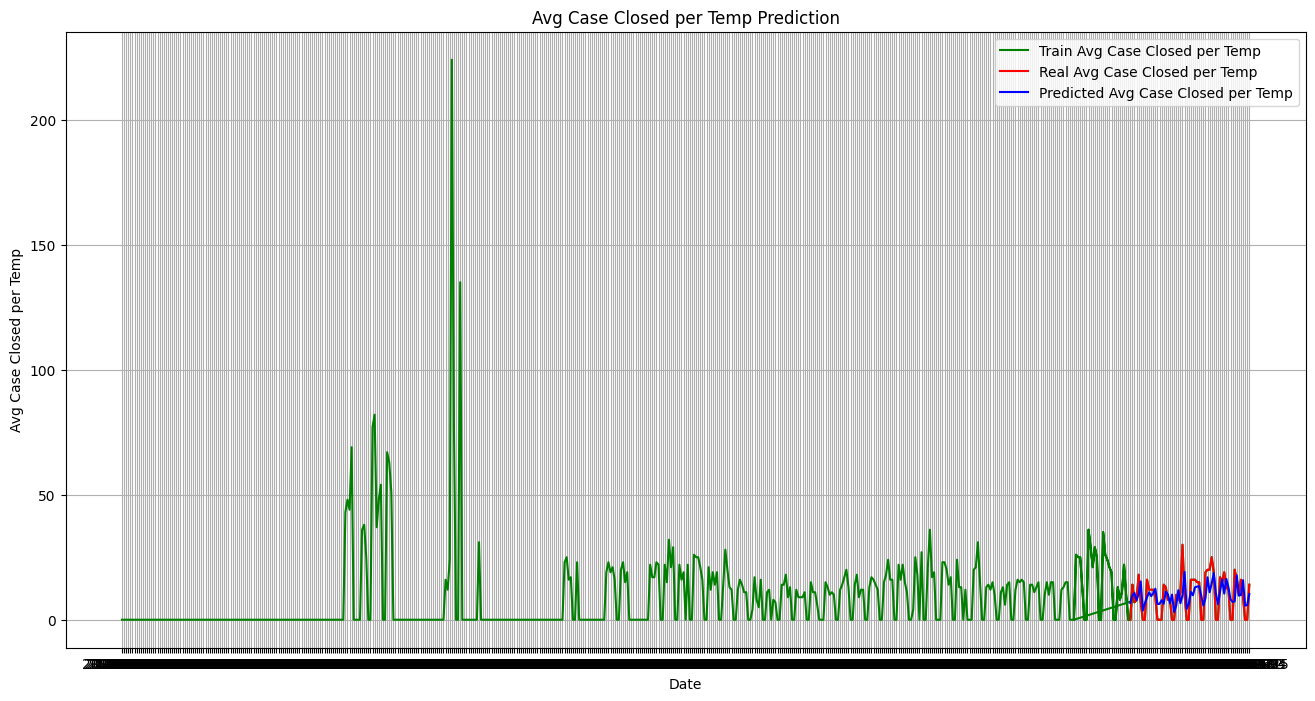

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df_combined.index[-600:], df_combined['Avg Case Closed per Temp'].tail(600), color='green', label = 'Train Avg Case Closed per Temp')
plt.plot(test_data.index, y, color = 'red', label = 'Real Avg Case Closed per Temp')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Avg Case Closed per Temp')
plt.title('Avg Case Closed per Temp Prediction')
plt.xlabel('Date')
plt.ylabel('Avg Case Closed per Temp')
plt.legend()
plt.grid(True)
plt.show()

## Predicting for 2024, by Week

In [8]:
last_2_months = df_combined[-90:-30]
print(len(last_2_months))

60


In [67]:
# Combine training data from 2022 and 2023
combined_train_data = last_2_months['Avg Case Closed per Temp'] # Assuming test_arima contains data for 2022 and 2023

# Initialize history with combined training data
history = [x for x in combined_train_data]

predictions_2024 = list()


# Number of time steps to forecast for 2024
num_steps_2024 = 7

# Iterate over the number of time steps to make predictions for 2024
for i in range(num_steps_2024):
    # Fit ARIMA model with seasonal differencing
    model = ARIMA(history, order=(14, 0, 0))
    model_fit = model.fit()

    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions_2024.append(yhat)

    # Update the history with the forecasted value
    history.append(yhat)

# Now predictions_2024 contains the predicted values for 2024

print(predictions_2024)

[3.0798929707000564, 16.351878261246185, 14.422211110032467, 14.96387113098757, 22.77221386360316, 17.388841990813365, 6.786764995279206]


C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


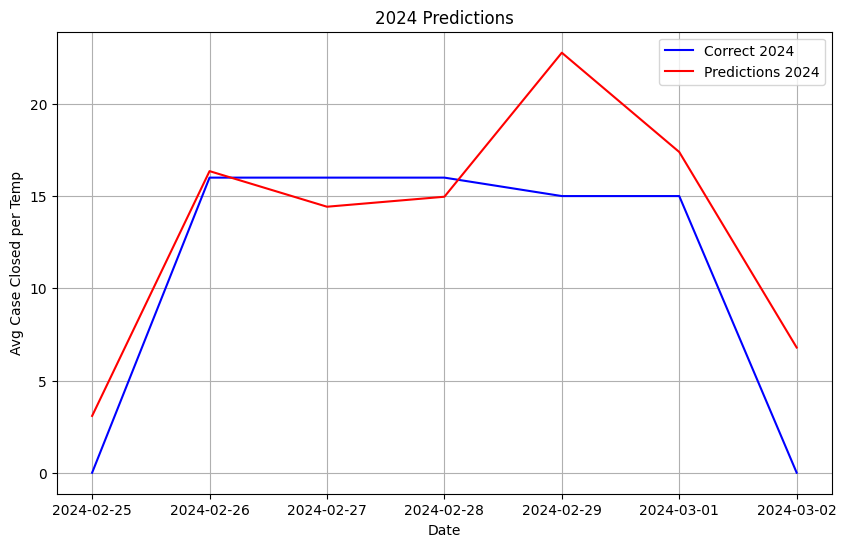

MSE: 17.90665619085953
MAE: 3.2847871200888474
RMSE: 4.231625714883055
Measure error compared to the scale of actual values : 29.478858770028122


In [68]:
# Assuming your original data is in a pandas Series or DataFrame format
# and the index is a datetime index
# Create a time index for the 2024 period
start_date_2024 = pd.Timestamp('2024-02-25')
end_date_2024 = start_date_2024 + datetime.timedelta(days=6)
time_index_2024 = pd.date_range(start=start_date_2024, end=end_date_2024, freq='D')

filtered_values = df_combined.loc[str(start_date_2024.date()):str(end_date_2024.date()), 'Avg Case Closed per Temp']

# # Plotting
plt.figure(figsize=(10, 6))

plt.plot(time_index_2024, filtered_values, label='Correct 2024', color='blue')

# Plot predicted values for 2024
plt.plot(time_index_2024, predictions_2024, label='Predictions 2024', color='red')

plt.title('2024 Predictions')
plt.xlabel('Date')
plt.ylabel('Avg Case Closed per Temp')
plt.legend()
plt.grid(True)
plt.show()

# report performance
mse = mean_squared_error(filtered_values, predictions_2024)
print('MSE: '+str(mse))
mae = mean_absolute_error(filtered_values, predictions_2024)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(filtered_values, predictions_2024))
print('RMSE: '+str(rmse))

mean_actual_values = filtered_values.mean()
error_percentage = (mae / mean_actual_values) * 100
print("Measure error compared to the scale of actual values :", error_percentage)

## Predicting for 2024, by Month

In [11]:
last_100_days = df_combined[-130:-30]
print(len(last_100_days))

100


In [59]:
# Combine training data from 2022 and 2023
combined_train_data = last_100_days['Avg Case Closed per Temp'] # Assuming test_arima contains data for 2022 and 2023

# Initialize history with combined training data
history = [x for x in combined_train_data]

predictions_2024 = list()


# Number of time steps to forecast for 2024
num_steps_2024 = 30

# Iterate over the number of time steps to make predictions for 2024
for i in range(num_steps_2024):
    # Fit ARIMA model with seasonal differencing
    model = ARIMA(history, order=(12, 0, 0))
    model_fit = model.fit()

    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions_2024.append(yhat)

    # Update the history with the forecasted value
    history.append(yhat)

# Now predictions_2024 contains the predicted values for 2024

print(predictions_2024)

[5.363334099378551, 15.739022176854736, 12.45400505319315, 18.822134438239672, 23.462986595943406, 14.054637425093384, 6.376511503674067, 10.211701402414203, 13.0814135335991, 12.016981353950147, 19.62137523108985, 22.042714367783148, 13.6072478362738, 7.1687917069548694, 9.906377822776433, 10.649034275698174, 11.724698022846372, 17.541719742378305, 18.81426516760011, 12.213163490652697, 8.192736918759064, 9.143111671151555, 8.963934477582562, 10.962836711429079, 16.22243178549092, 16.9663250135333, 12.003720424799983, 9.229387449312302, 9.110007242907749, 8.85067049926743]


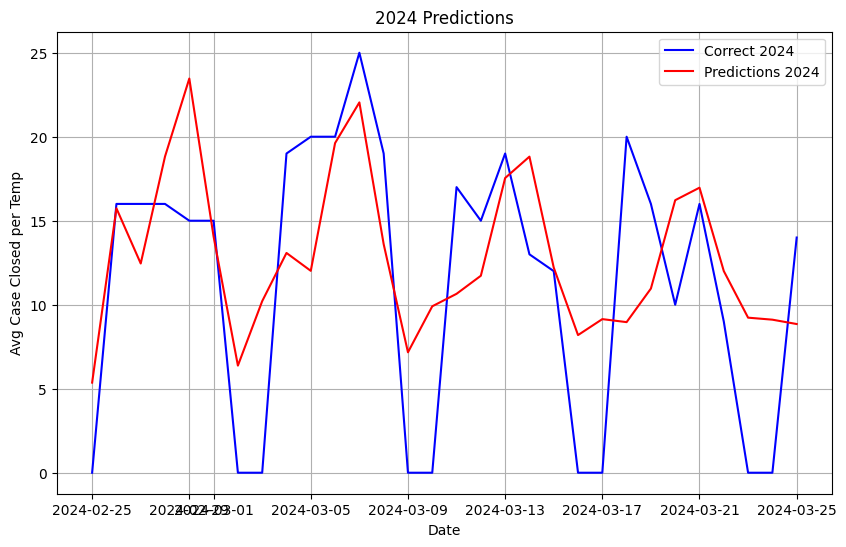

MSE: 39.37909506023774
MAE: 5.396556534218321
RMSE: 6.275276492732232
Measure error compared to the scale of actual values : 47.33821521244141


In [60]:
# Assuming your original data is in a pandas Series or DataFrame format
# and the index is a datetime index
# Create a time index for the 2024 period
start_date_2024 = pd.Timestamp('2024-02-25')
end_date_2024 = start_date_2024 + datetime.timedelta(days=29)
time_index_2024 = pd.date_range(start=start_date_2024, end=end_date_2024, freq='D')

filtered_values = df_combined.loc[str(start_date_2024.date()):str(end_date_2024.date()), 'Avg Case Closed per Temp']

# # Plotting
plt.figure(figsize=(10, 6))

plt.plot(time_index_2024, filtered_values, label='Correct 2024', color='blue')

# Plot predicted values for 2024
plt.plot(time_index_2024, predictions_2024, label='Predictions 2024', color='red')

plt.title('2024 Predictions')
plt.xlabel('Date')
plt.ylabel('Avg Case Closed per Temp')
plt.legend()
plt.grid(True)
plt.show()

# report performance
mse = mean_squared_error(filtered_values, predictions_2024)
print('MSE: '+str(mse))
mae = mean_absolute_error(filtered_values, predictions_2024)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(filtered_values, predictions_2024))
print('RMSE: '+str(rmse))

mean_actual_values = filtered_values.mean()
error_percentage = (mae / mean_actual_values) * 100
print("Measure error compared to the scale of actual values :", error_percentage)

# Dynamic Updating

In [14]:
df_2022_2024_testing = df_combined.copy()
df_2022_2024_testing = df_2022_2024_testing[-90:]

# df_2022_2024_testing.set_index('Date', inplace=True)
df_2022_2024_testing

,Avg Case Closed Per CSE,Avg Case Closed Per CSA,Avg Case Closed Per TL,Avg Case Closed per Temp,Average Case Closed per CfS,Avg Case Closed per Sup
Date,,,,,,
2024-01-27,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-28,6.0,0.0,0.0,0.0,0.0,0.0
2024-01-29,29.0,23.0,13.0,14.0,13.0,3.0
2024-01-30,26.0,20.0,13.0,7.0,21.0,0.0
2024-01-31,24.0,22.0,6.0,8.0,21.0,4.0
...,...,...,...,...,...,...
2024-03-21,30.0,18.0,20.0,16.0,16.0,0.0
2024-03-22,34.0,29.0,24.0,9.0,14.0,0.0
2024-03-23,0.0,0.0,6.0,0.0,0.0,0.0


In [15]:
cse_input = input("Enter today's Average Case Closure rate by CSE: ")
csa_input = input("Enter today's Average Case Closure rate by CSA: ")
temp_input = input("Enter today's Average Case Closure rate by Temp: ")

try:
    cse_balance = float(cse_input)
    csa_balance = float(csa_input)
    temp_balance = float(temp_input)
except ValueError:
    print("Error: Please enter valid numbers for balances.")
else:
    #today_date = datetime.now().strftime('%Y-%m-%d')  # Get today's date in YYYY-MM-DD format
    new_data = {'Avg Case Closed Per CSE': cse_balance,
                'Avg Case Closed Per CSA': csa_balance,
                'Avg Case Closed per Temp': temp_balance
                }
    df_2022_2024_testing = df_2022_2024_testing.append(new_data, ignore_index=True)
    print("Values successfully added to DataFrame.")
    print(df_2022_2024_testing[-7:])

df_2022_2024_testing

Values successfully added to DataFrame.
    Avg Case Closed Per CSE  Avg Case Closed Per CSA  Avg Case Closed Per TL  \
84                     30.0                     24.0                    23.0   
85                     30.0                     18.0                    20.0   
86                     34.0                     29.0                    24.0   
87                      0.0                      0.0                     6.0   
88                      0.0                      0.0                     0.0   
89                     36.0                     23.0                    21.0   
90                     10.0                     10.0                     NaN   

    Avg Case Closed per Temp  Average Case Closed per CfS  \
84                      10.0                         16.0   
85                      16.0                         16.0   
86                       9.0                         14.0   
87                       0.0                          0.0   
88            

C:\Users\janic\AppData\Local\Temp\ipykernel_14988\3790084694.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2022_2024_testing = df_2022_2024_testing.append(new_data, ignore_index=True)


,Avg Case Closed Per CSE,Avg Case Closed Per CSA,Avg Case Closed Per TL,Avg Case Closed per Temp,Average Case Closed per CfS,Avg Case Closed per Sup
0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,0.0,0.0,0.0,0.0,0.0
2,29.0,23.0,13.0,14.0,13.0,3.0
3,26.0,20.0,13.0,7.0,21.0,0.0
4,24.0,22.0,6.0,8.0,21.0,4.0
...,...,...,...,...,...,...
86,34.0,29.0,24.0,9.0,14.0,0.0
87,0.0,0.0,6.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0
89,36.0,23.0,21.0,14.0,6.0,0.0


In [16]:
# # Initialize an empty list to store predictions for 2024
predictions_2024 = []

# Number of time steps to forecast for each update
num_steps_2024 = 7

combined_train_data = df_2022_2024_testing['Avg Case Closed per Temp']
history = combined_train_data.tolist()

if len(combined_train_data) >= 90:

    history.pop(0)  # Remove the oldest value from history
    combined_train_data.pop(0) # Remove the oldest value from combined_train_data
    df_2022_2024_testing = df_2022_2024_testing.drop(df_2022_2024_testing.index[0])

# Make predictions for the next 7 days
for i in range(num_steps_2024):
    # Fit ARIMA model with seasonal differencing
    model = ARIMA(history, order=(7, 1, 1)) # 7, 1, 0 is the best combination
    model_fit = model.fit()

    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions_2024.append(yhat)

    # Update the history with the forecasted value
    history.append(yhat)


#combined_train_data.pop(0)

# Now predictions_2024 contains the predicted values for 2024
print(len(combined_train_data))
print(predictions_2024)


C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


90
[9.629713868014514, 12.081815645335007, 9.1855911405964, 0.4658131715631626, 3.7448453428429795, 11.03324921136867, 10.180884878734918]


In [17]:
print(len(history))
print(history)

97
[0.0, 14.0, 7.0, 8.0, 0.0, 26.0, 25.0, 25.0, 13.0, 0.0, 0.0, 36.0, 29.0, 21.0, 29.0, 25.0, 0.0, 0.0, 35.0, 26.0, 24.0, 21.0, 19.0, 0.0, 0.0, 13.0, 8.0, 11.0, 22.0, 10.0, 0.0, 0.0, 14.0, 7.0, 8.0, 18.0, 7.0, 0.0, 0.0, 16.0, 12.0, 12.0, 12.0, 9.0, 0.0, 0.0, 0.0, 14.0, 13.0, 8.0, 8.0, 0.0, 0.0, 10.0, 8.0, 11.0, 30.0, 10.0, 0.0, 0.0, 16.0, 16.0, 16.0, 15.0, 15.0, 0.0, 0.0, 19.0, 20.0, 20.0, 25.0, 19.0, 0.0, 0.0, 17.0, 15.0, 19.0, 13.0, 12.0, 0.0, 0.0, 20.0, 16.0, 10.0, 16.0, 9.0, 0.0, 0.0, 14.0, 10.0, 9.629713868014514, 12.081815645335007, 9.1855911405964, 0.4658131715631626, 3.7448453428429795, 11.03324921136867, 10.180884878734918]


In [18]:
# start_date_2024 = pd.Timestamp.today().date()
# print(start_date_2024)
combined_train_data
df_2022_2024_testing

,Avg Case Closed Per CSE,Avg Case Closed Per CSA,Avg Case Closed Per TL,Avg Case Closed per Temp,Average Case Closed per CfS,Avg Case Closed per Sup
1,6.0,0.0,0.0,0.0,0.0,0.0
2,29.0,23.0,13.0,14.0,13.0,3.0
3,26.0,20.0,13.0,7.0,21.0,0.0
4,24.0,22.0,6.0,8.0,21.0,4.0
5,3.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...
86,34.0,29.0,24.0,9.0,14.0,0.0
87,0.0,0.0,6.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0
89,36.0,23.0,21.0,14.0,6.0,0.0


In [19]:
# turn dataframe back into date index
today_date = pd.to_datetime('2024-03-26')

# 90 days prior
start_historical_date = today_date - timedelta(days=89)
# date range for 90 days
historical_date_range = pd.date_range(start=start_historical_date, end=today_date, freq='D')
print(len(historical_date_range))
# make date the index
df_2022_2024_testing.index = historical_date_range

df_2022_2024_testing

90


,Avg Case Closed Per CSE,Avg Case Closed Per CSA,Avg Case Closed Per TL,Avg Case Closed per Temp,Average Case Closed per CfS,Avg Case Closed per Sup
2023-12-28,6.0,0.0,0.0,0.0,0.0,0.0
2023-12-29,29.0,23.0,13.0,14.0,13.0,3.0
2023-12-30,26.0,20.0,13.0,7.0,21.0,0.0
2023-12-31,24.0,22.0,6.0,8.0,21.0,4.0
2024-01-01,3.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...
2024-03-22,34.0,29.0,24.0,9.0,14.0,0.0
2024-03-23,0.0,0.0,6.0,0.0,0.0,0.0
2024-03-24,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-25,36.0,23.0,21.0,14.0,6.0,0.0


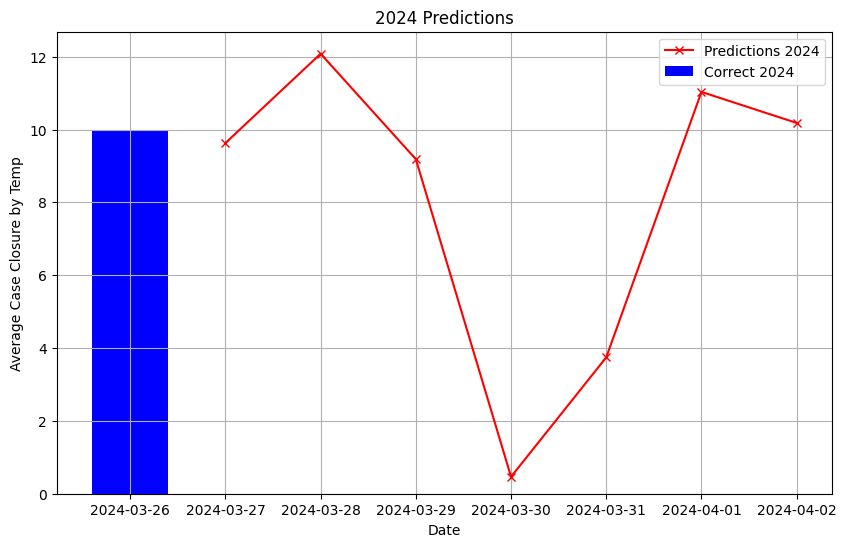

In [20]:
# Sample data for filtered_values
filtered_values = df_2022_2024_testing['Avg Case Closed per Temp'][-1:]

# Calculate the start and end dates for predictions
pred_start_date = pd.Timestamp('2024-03-27')
pred_end_date = pred_start_date + pd.Timedelta(days=6)
time_index_2024 = pd.date_range(start=pred_start_date, end=pred_end_date, freq='D')

# Plotting
plt.figure(figsize=(10, 6))

# Plot filtered_values as a bar plot
plt.bar(df_2022_2024_testing.index[-1:], filtered_values, label='Correct 2024', color='blue')

# Plot predicted values for 2024 as a line plot
plt.plot(time_index_2024, predictions_2024, marker='x', label='Predictions 2024', color='red')

plt.title('2024 Predictions')
plt.xlabel('Date')
plt.ylabel('Average Case Closure by Temp')
plt.legend()
plt.grid(True)
plt.show()